# Julia 機器學習：Clustering 分群模型

本範例需要使用到的套件有 Clustering、Distances，請在執行以下範例前先安裝。

```
] add Clustering
] add Distances
```

In [1]:
using Pkg
Pkg.add("Clustering")
Pkg.add("Distances")
using Clustering, Distances, RDatasets, Gadfly

   Updating registry at `C:\Users\s7070\.julia\registries\General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


    Fetching: [==============>                          ]  33.1

    Fetching: [=============================>

Fetching: [========================================>]  100.0 %

  Resolving package versions...
  Installed OpenBLAS_jll ─ v0.3.9+4
   Updating `C:\Users\s7070\.julia\environments\v1.4\Project.toml`
  [aaaa29a8] + Clustering v0.14.0
   Updating `C:\Users\s7070\.julia\environments\v1.4\Manifest.toml`
  [4536629a] ↑ OpenBLAS_jll v0.3.9+3 ⇒ v0.3.9+4
  Resolving package versions...
   Updating `C:\Users\s7070\.julia\environments\v1.4\Project.toml`
  [b4f34e82] + Distances v0.8.2
   Updating `C:\Users\s7070\.julia\environments\v1.4\Manifest.toml`
 [no changes]
┌ Info: Precompiling Clustering [aaaa29a8-35af-508c-8bc3-b662a17a0fe5]
└ @ Base loading.jl:1260
┌ Info: Precompiling Gadfly [c91e804a-d5a3-530f-b6f0-dfbca275c004]
└ @ Base loading.jl:1260
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **



## K-means 模型示範

## 載入資料

In [2]:
iris = RDatasets.dataset("datasets", "iris")
first(iris, 6)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Categorical…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [3]:
X = Matrix(iris[:, 1:2])'

2×150 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 5.1  4.9  4.7  4.6  5.0  5.4  4.6  5.0  …  6.8  6.7  6.7  6.3  6.5  6.2  5.9
 3.5  3.0  3.2  3.1  3.6  3.9  3.4  3.4     3.2  3.3  3.0  2.5  3.0  3.4  3.0

## K-means 分群模型

In [4]:
k = 3
result = kmeans(X, k)

KmeansResult{Array{Float64,2},Float64,Int64}([6.823913043478258 5.003921568627451 5.800000000000001; 3.0782608695652165 3.409803921568628 2.6999999999999997], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 3, 1, 1, 1, 3, 1, 1, 3], [0.017366397539404943, 0.17873894655902234, 0.13638600538254764, 0.25913110342175116, 0.03618992695118095, 0.397170319108028, 0.16324875048059084, 0.00011149557862211168, 0.6246212995001983, 0.10677816224529124  …  0.015827032136115804, 0.006261814744803473, 1.4210854715202004e-14, 0.015392249527408808, 0.0645226843100346, 0.021479206049150434, 0.28999999999999204, 0.11104442344046106, 0.49278355387524186, 0.09999999999999432], [46, 51, 53], [46, 51, 53], 37.08627024722928, 17, true)

## 取得分群

In [5]:
iris[!, :cluster] = string.(assignments(result));

## 取得群中心

In [6]:
result.centers

2×3 Array{Float64,2}:
 6.82391  5.00392  5.8
 3.07826  3.4098   2.7

## 視覺化分群結果

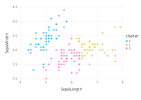

In [7]:
plot(iris, x="SepalLength", y="SepalWidth", color="cluster", Geom.point)

## K-medoids 模型示範

## 前處理

In [8]:
n = nrow(iris)
D = zeros(n, n)
for i = 1:n
    a = Vector{Float64}(iris[i, 1:4])
    for j = 1:n
        b = Vector{Float64}(iris[j, 1:4])
        D[i, j] = euclidean(a, b)
    end
end

## K-medoids 模型

In [9]:
k = 3
result = kmedoids(D, k)

KmedoidsResult{Float64}([127, 35, 49], [3, 2, 2, 2, 3, 3, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0.30000000000000027, 0.14142135623730964, 0.3000000000000001, 0.3000000000000007, 0.3316624790355399, 0.36055512754639896, 0.4472135954999583, 0.31622776601683766, 0.5477225575051662, 0.1  …  1.1575836902790224, 0.9591663046625439, 0.5196152422706632, 1.4071247279470291, 1.341640786499874, 0.8366600265340757, 0.38729833462074154, 0.5744562646538031, 0.9848857801796107, 0.4690415759823428], [97, 29, 24], 123.50784471887326, 2, true)

## 取得分群

In [10]:
iris[!, :cluster] = string.(assignments(result));

## 取得群中心

In [11]:
iris[result.medoids, :]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,cluster
,Float64,Float64,Float64,Float64,Categorical…,String
1,6.2,2.8,4.8,1.8,virginica,1
2,4.9,3.1,1.5,0.2,setosa,2
3,5.3,3.7,1.5,0.2,setosa,3


## 視覺化分群結果

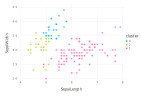

In [12]:
plot(iris, x="SepalLength", y="SepalWidth", color="cluster", Geom.point)